In [1]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import HoverTool, ColumnDataSource, Span
import pandas as pd

# File path for your CSV
file_path = '/Users/stephaniebellew/Desktop/Experiment1_Location1.csv'

# Step 1: Load the CSV data into a Pandas DataFrame
df = pd.read_csv(file_path)

# Step 2: Clean column names by stripping spaces
df.columns = df.columns.str.strip()

# Step 3: Slice the DataFrame to get rows 2 to 72 (adjust as needed)
df_subset = df.iloc[1190:23745]

# Step 4: Convert the 'timestamp' column to datetime format
df_subset['timestamp'] = pd.to_datetime(df_subset['timestamp'])

# Step 5: Filter out rows with missing VOC data (using 'VOC / ppb')
df_subset = df_subset.dropna(subset=['VOC / ppm'])

# Step 6: Calculate mean and standard deviation for VOC levels (in ppb)
voc_mean_ppb = df_subset['VOC / ppm'].mean()
voc_sd_ppb = df_subset['VOC / ppm'].std()

# Convert mean and standard deviation to ppm (divide by 1000)
voc_mean_ppm = voc_mean_ppb / 1000
voc_sd_ppm = voc_sd_ppb / 1000

# Step 7: Create a ColumnDataSource for plotting
source = ColumnDataSource(df_subset)

# Step 8: Create a figure for plotting
p = figure(x_axis_type="datetime", title="VOC / ppb with Window Closed", width=800, height=400)

# Step 9: Create a hover tool to display data when hovering over points
hover = HoverTool()
hover.tooltips = [
    ("Timestamp", "@timestamp{%F %T}"),  # Display timestamp in a readable format
    ("VOC", "@{VOC / ppm} ppb")
]
hover.formatters = {'@timestamp': 'datetime'}  # Format the timestamp field as datetime

# Step 10: Add the hover tool to the plot
p.add_tools(hover)

# Step 11: Plot the VOC data (in ppb)
p.line('timestamp', 'VOC / ppm', source=source, legend_label="VOC (ppb)", line_width=2, color="darkorange")

# Step 12: Add horizontal lines for mean and standard deviation in ppm
mean_line = Span(location=voc_mean_ppb, dimension='width', line_color='darkblue', line_width=2, line_dash='dashed')  # Mean line in ppb
sd_upper_line = Span(location=(voc_mean_ppb + voc_sd_ppb), dimension='width', line_color='blue', line_width=4, line_dash='dotted')  # SD upper line in ppb
sd_lower_line = Span(location=(voc_mean_ppb - voc_sd_ppb), dimension='width', line_color='blue', line_width=4, line_dash='dotted')  # SD lower line in ppb

# Add the lines to the plot
p.add_layout(mean_line)
p.add_layout(sd_upper_line)
p.add_layout(sd_lower_line)

# Step 13: Define VOC thresholds in ppm (converted from ppb)
voc_thresholds_ppm = {
    0.2: ('Low VOC', 'purple'),          # Low VOC concentration (0.2 ppm)
    0.4: ('Moderate VOC', 'green'),    # Moderate VOC concentration (0.4 ppm)
    0.6: ('High VOC', 'orange'),       # High VOC concentration (0.6 ppm)
    1.0: ('Very High VOC', 'red')      # Very High VOC concentration (1.0 ppm)
}

# Add horizontal lines for the VOC thresholds in ppm
threshold_data = {'x': [], 'y': [], 'label': []}  # Data for labels

for threshold_ppm, (label, color) in voc_thresholds_ppm.items():
    threshold_ppb = threshold_ppm * 1000  # Convert ppm to ppb (multiply by 1000)
    
    # Add the threshold lines (in ppb)
    threshold_line = Span(location=threshold_ppb, dimension='width', line_color=color, line_width=2, line_dash='solid')
    p.add_layout(threshold_line)

    # Add data for the label, placing it on the first timestamp (x = df_subset['timestamp'].iloc[0])
    threshold_data['x'].append(df_subset['timestamp'].iloc[0])  # Use the first timestamp
    threshold_data['y'].append(threshold_ppb)  # Convert threshold to ppb for label placement
    threshold_data['label'].append(label)  # The label for the threshold

# Create a ColumnDataSource for the threshold labels
threshold_source = ColumnDataSource(threshold_data)

# Step 14: Add text labels to the plot
p.text(x='x', y='y', text='label', source=threshold_source, 
       angle=0, text_baseline="middle", text_align="left", 
       color='black', text_font_size='10pt')  # Use text_font_size instead of size

# Step 15: Configure the plot
p.xaxis.axis_label = 'Time / hours'
p.yaxis.axis_label = 'VOC / ppb '  # y-axis in ppb since data is in ppb


# Step 16: Display the plot in Jupyter Notebook
output_notebook()
show(p)

/var/folders/g8/j8h27fk94g72cxw24lfvm6h80000gn/T/ipykernel_8642/3800730635.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['timestamp'] = pd.to_datetime(df_subset['timestamp'])


Loading BokehJS ...

In [2]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import HoverTool, ColumnDataSource, Span
import pandas as pd

# File path for your CSV
file_path = '/Users/stephaniebellew/Desktop/Experiment1_Location1.csv'

# Step 1: Load the CSV data into a Pandas DataFrame
df = pd.read_csv(file_path)

# Step 2: Clean column names by stripping spaces
df.columns = df.columns.str.strip()

# Step 3: Slice the DataFrame to get rows (adjust as needed, example takes rows from index 1190 to 23745)
df_subset = df.iloc[1190:23745]

# Step 4: Convert the 'timestamp' column to datetime format
df_subset['timestamp'] = pd.to_datetime(df_subset['timestamp'])

# Step 5: Filter out rows with missing CO2 data (using 'CO2 / ppm')
df_subset = df_subset.dropna(subset=['CO2 / ppm'])

# Step 6: Calculate mean and standard deviation for CO2 levels (in ppm)
co2_mean_ppm = df_subset['CO2 / ppm'].mean()
co2_sd_ppm = df_subset['CO2 / ppm'].std()

# Step 7: Create a ColumnDataSource for plotting
source = ColumnDataSource(df_subset)

# Step 8: Create a figure for plotting
p = figure(x_axis_type="datetime", title="CO2 / ppm Levels", width=800, height=400)

# Step 9: Create a hover tool to display data when hovering over points
hover = HoverTool()
hover.tooltips = [
    ("Timestamp", "@timestamp{%F %T}"),  # Display timestamp in a readable format
    ("CO2", "@{CO2 / ppm} ppm")
]
hover.formatters = {'@timestamp': 'datetime'}  # Format the timestamp field as datetime

# Step 10: Add the hover tool to the plot
p.add_tools(hover)

# Step 11: Plot the CO2 data (in ppm)
p.line('timestamp', 'CO2 / ppm', source=source, legend_label="CO2 (ppm)", line_width=2, color="darkorange")

# Step 12: Add horizontal lines for mean and standard deviation in ppm
mean_line = Span(location=co2_mean_ppm, dimension='width', line_color='darkblue', line_width=2, line_dash='dashed')  # Mean line
sd_upper_line = Span(location=(co2_mean_ppm + co2_sd_ppm), dimension='width', line_color='blue', line_width=4, line_dash='dotted')  # SD upper line
sd_lower_line = Span(location=(co2_mean_ppm - co2_sd_ppm), dimension='width', line_color='blue', line_width=4, line_dash='dotted')  # SD lower line

# Add the lines to the plot
p.add_layout(mean_line)
p.add_layout(sd_upper_line)
p.add_layout(sd_lower_line)

# Step 13: Define CO2 thresholds in ppm (adjusted for CO2)
co2_thresholds_ppm = {
    400: ('Low CO2', 'purple'),          # Low CO2 concentration (400 ppm)
    600: ('Moderate CO2', 'green'),     # Moderate CO2 concentration (600 ppm)
    800: ('High CO2', 'red'),        # High CO2 concentration (800 ppm)
    1000: ('Very High CO2', 'darkred')      # Very High CO2 concentration (1000 ppm)
}

# Add horizontal lines for the CO2 thresholds in ppm
threshold_data = {'x': [], 'y': [], 'label': []}  # Data for labels

for threshold_ppm, (label, color) in co2_thresholds_ppm.items():
    # Add the threshold lines (in ppm)
    threshold_line = Span(location=threshold_ppm, dimension='width', line_color=color, line_width=2, line_dash='solid')
    p.add_layout(threshold_line)

    # Add data for the label, placing it on the first timestamp (x = df_subset['timestamp'].iloc[0])
    threshold_data['x'].append(df_subset['timestamp'].iloc[0])  # Use the first timestamp
    threshold_data['y'].append(threshold_ppm)  # Threshold value in ppm for label placement
    threshold_data['label'].append(label)  # The label for the threshold

# Create a ColumnDataSource for the threshold labels
threshold_source = ColumnDataSource(threshold_data)

# Step 14: Add text labels to the plot
p.text(x='x', y='y', text='label', source=threshold_source, 
       angle=0, text_baseline="middle", text_align="left", 
       color='black', text_font_size='10pt')  # Use text_font_size instead of size

# Step 15: Configure the plot
p.xaxis.axis_label = 'Time / hours'
p.yaxis.axis_label = 'CO2 / ppm'  # y-axis in ppm

# Step 16: Display the plot in Jupyter Notebook
output_notebook()
show(p)


/var/folders/g8/j8h27fk94g72cxw24lfvm6h80000gn/T/ipykernel_8518/2060927120.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['timestamp'] = pd.to_datetime(df_subset['timestamp'])


Loading BokehJS ...

   IAQ1  IAQ2  IAQ Difference           timestamp
0  25.0  88.0           -63.0 2024-11-27 22:57:23
1  25.0  88.0           -63.0 2024-11-27 22:57:24
2  25.0  88.0           -63.0 2024-11-27 22:57:26
3  25.0  88.0           -63.0 2024-11-27 22:57:27
4  25.0  88.0           -63.0 2024-11-27 22:57:28


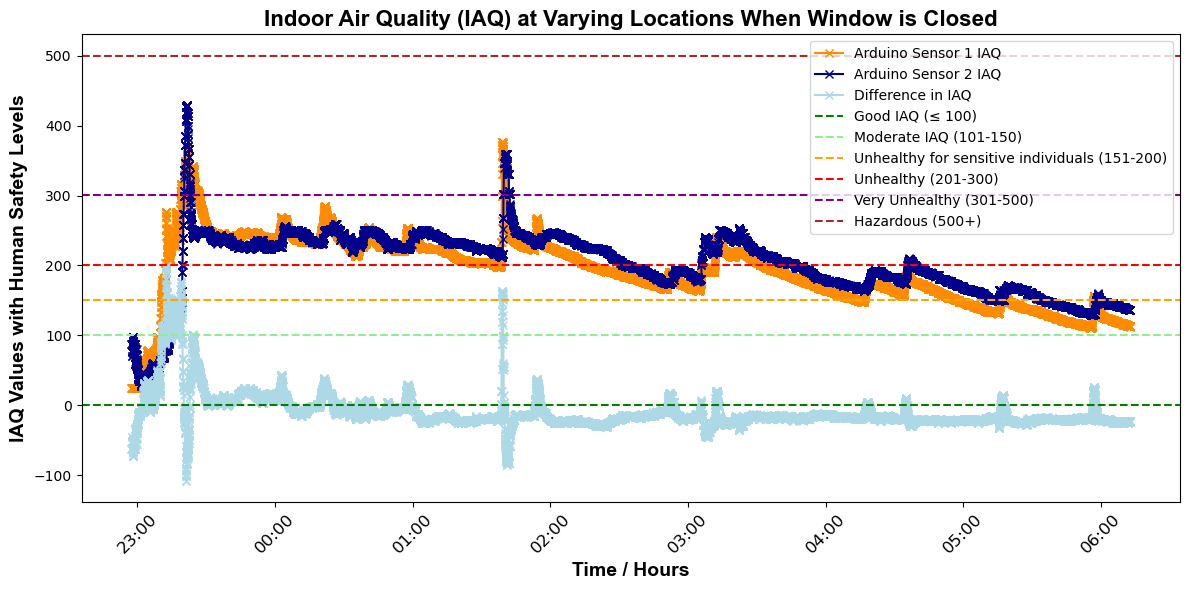

Plot saved to: /Users/stephaniebellew/Desktop/IAQ_plot.png


In [1]:
#text to speech graph
#uncomment the line below if you do not already have pyttsx3 installed 
#pip install pyttsx3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pyttsx3

# Initialize the pyttsx3 engine for text-to-speech
engine = pyttsx3.init()

# Load the Excel file
file_path = '/Users/stephaniebellew/Desktop/IAQWC.xlsx'
engine.say("Loading data from the file IAQWC.xlsx.")
df = pd.read_excel(file_path)

# Check the first few rows to ensure the column names are correct
engine.say("Displaying the first few rows of the data to verify the column names.")
print(df.head())

# Assuming your columns are: 'IAQ1', 'IAQ2', 'IAQ difference', and 'timestamp'
# If your column names are different, adjust accordingly

# Convert 'timestamp' column to pandas datetime format
engine.say("Converting the timestamp data to datetime format.")
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Define IAQ thresholds for health categories
thresholds = {
    "Good IAQ": 0,                # Below this value is considered Good
    "Moderate IAQ": 101,            # Moderate IAQ up to this value
    "Unhealthy for sensitive individuals": 151,
    "Unhealthy": 201,
    "Very Unhealthy": 301,
    "Hazardous": 500                # Hazardous beyond 500
}

# Plotting
engine.say("Starting to generate the plot for Indoor Air Quality data.")
plt.figure(figsize=(12, 6))

# Plot 'IAQ1', 'IAQ2', and 'IAQ difference' against 'timestamp'
plt.plot(df['timestamp'], df['IAQ1'], label='Arduino Sensor 1 IAQ', marker='x', color='darkorange')
plt.plot(df['timestamp'], df['IAQ2'], label='Arduino Sensor 2 IAQ', marker='x', color='darkblue')
plt.plot(df['timestamp'], df['IAQ Difference'], label='Difference in IAQ', marker='x', color='lightblue')

# Add threshold lines for IAQ categories
plt.axhline(thresholds["Good IAQ"], color='green', linestyle='--', label="Good IAQ (≤ 100)")
plt.axhline(thresholds["Moderate IAQ"], color='lightgreen', linestyle='--', label="Moderate IAQ (101-150)")
plt.axhline(thresholds["Unhealthy for sensitive individuals"], color='orange', linestyle='--', label="Unhealthy for sensitive individuals (151-200)")
plt.axhline(thresholds["Unhealthy"], color='red', linestyle='--', label="Unhealthy (201-300)")
plt.axhline(thresholds["Very Unhealthy"], color='purple', linestyle='--', label="Very Unhealthy (301-500)")
plt.axhline(thresholds["Hazardous"], color='brown', linestyle='--', label="Hazardous (500+)")

# Formatting the x-axis to display Hours:Minutes (HH:MM)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Set labels for the axes with larger font size, bold, and Arial font
plt.xlabel('Time / Hours', fontsize=14, fontweight='bold', family='Arial')
plt.ylabel('IAQ Values with Human Safety Levels', fontsize=14, fontweight='bold', family='Arial')

# Set title with larger font size, bold, and Arial font
plt.title('Indoor Air Quality (IAQ) at Varying Locations When Window is Closed', 
          fontsize=16, fontweight='bold', family='Arial')

# Add a legend
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Tight layout to prevent label cut-off
plt.tight_layout()

# Save the plot to your desktop
save_path = '/Users/stephaniebellew/Desktop/IAQ_plot.png'  # Change the extension if needed
plt.savefig(save_path)

# Description of the plot for the visually impaired
engine.say("The chart illustrates the difference in IAQ which stands for Indoor Air Quality across two locations in a room when the window is closed in a bedroom overnight.The Indoor Air Quality starts at a safe level, but as time progresses, it increases, peaking twice at levels which are very unhealthy. There is very little difference in IAQ between the two locations, suggesting poor ventilation when the window is closed.")

# Run the speech engine to read out the description
engine.runAndWait()

# Show the plot
plt.show()

# Inform the user that the plot has been saved
engine.say(f"The plot has been saved to: {save_path}")
engine.runAndWait()

# Print the save path to the console for confirmation
print(f"Plot saved to: {save_path}")


Columns after removing constant columns: ['Temperature / C', 'Humidity / %', 'IAQ', 'VOC / ppm', 'CO2 / ppm']


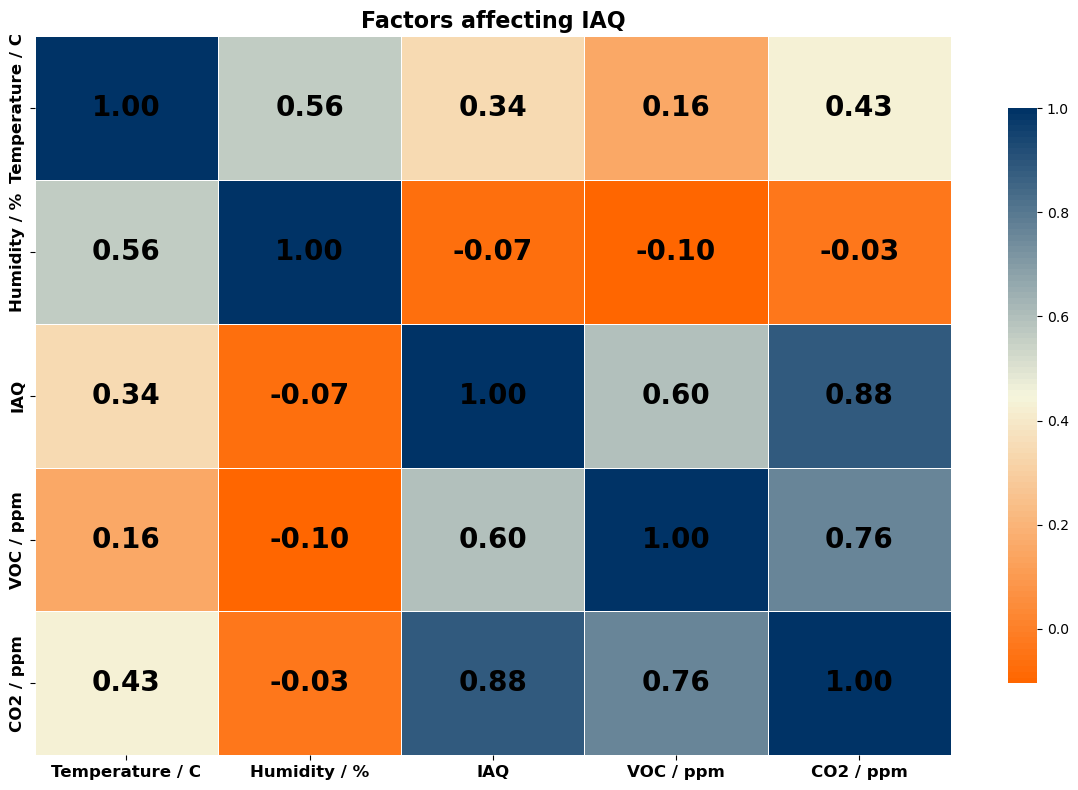

In [ ]:
#Colourblind accessible heatmap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

# Load the CSV data into a pandas DataFrame
file_path = '/Users/stephaniebellew/Desktop/Experiment1_Location1.csv'

# Load the data
df = pd.read_csv(file_path)

# Clean the column names (remove extra spaces)
df.columns = df.columns.str.strip()

# Rename columns: 'Compensated Humidity / C' to 'Humidity / %' and 'VOC / ppb' to 'VOC / ppm'
df.rename(columns={
    'Compensated Humidity / C': 'Humidity / %',
    'VOC / ppb': 'VOC / ppm',
    'iaq':'IAQ',
    'Compensated Temperature / C': 'Temperature / C'
}, inplace=True)

# Selecting relevant columns for the heatmap
relevant_columns = [
    'Temperature / C',  # Arduino indoor temperature
    'Humidity / %',                # Arduino indoor humidity (after renaming)
    'IAQ',                         # Indoor air quality
    'VOC / ppm',                   # VOC pollution concentration (after renaming)
    'CO2 / ppm'                    # CO2 pollution concentration
]

# Subset the DataFrame to include only the relevant columns
df_subset = df[relevant_columns]

# Ensure the data is numeric, converting errors to NaN (to handle any non-numeric data)
df_subset = df_subset.apply(pd.to_numeric, errors='coerce')

# Calculate the variance of each column (handling very small variance using a threshold)
column_variances = df_subset.var()

# Filter out columns where variance is very small (constant columns or nearly constant)
tolerance = 1e-5  # Variance threshold for filtering constant columns
df_subset_filtered = df_subset.loc[:, column_variances > tolerance]

# Check the filtered columns
print(f"Columns after removing constant columns: {df_subset_filtered.columns.tolist()}")

# Drop rows with missing data (NaN values) to ensure clean data for correlation
df_subset_filtered.dropna(inplace=True)

# Calculate the correlation matrix
correlation_matrix = df_subset_filtered.corr()

# Create a custom colormap
colors = ["#FF6600", "#F5F5DC", "#003366"]  # Orange -> White -> Dark Blue
n_bins = 100  # Use 100 bins for smooth transitions
cmap_name = "custom_cmap"
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plotting the heatmap with the custom colormap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=cm, fmt='.2f', linewidths=0.5,
            annot_kws={'size': 20, 'color': 'black', 'weight': 'bold'},  # Black annotation text
            cbar_kws={'shrink': 0.8})

# Customize column and row labels' font size and boldness
plt.xticks(fontsize=12, fontweight='bold')  # Column labels
plt.yticks(fontsize=12, fontweight='bold')  # Row labels

# Add title
plt.title('Factors affecting IAQ', fontsize=16, fontweight='bold')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Save the plot to your desktop (this will now avoid cropping)
plt.savefig('/Users/stephaniebellew/Desktop/correlation_heatmap_custom_black_text_bold_labels.png', dpi=300)

# Show the plot
plt.show()

Columns after removing constant columns: ['Temperature / C', 'Humidity / %', 'IAQ', 'VOC / ppm', 'CO2 / ppm']


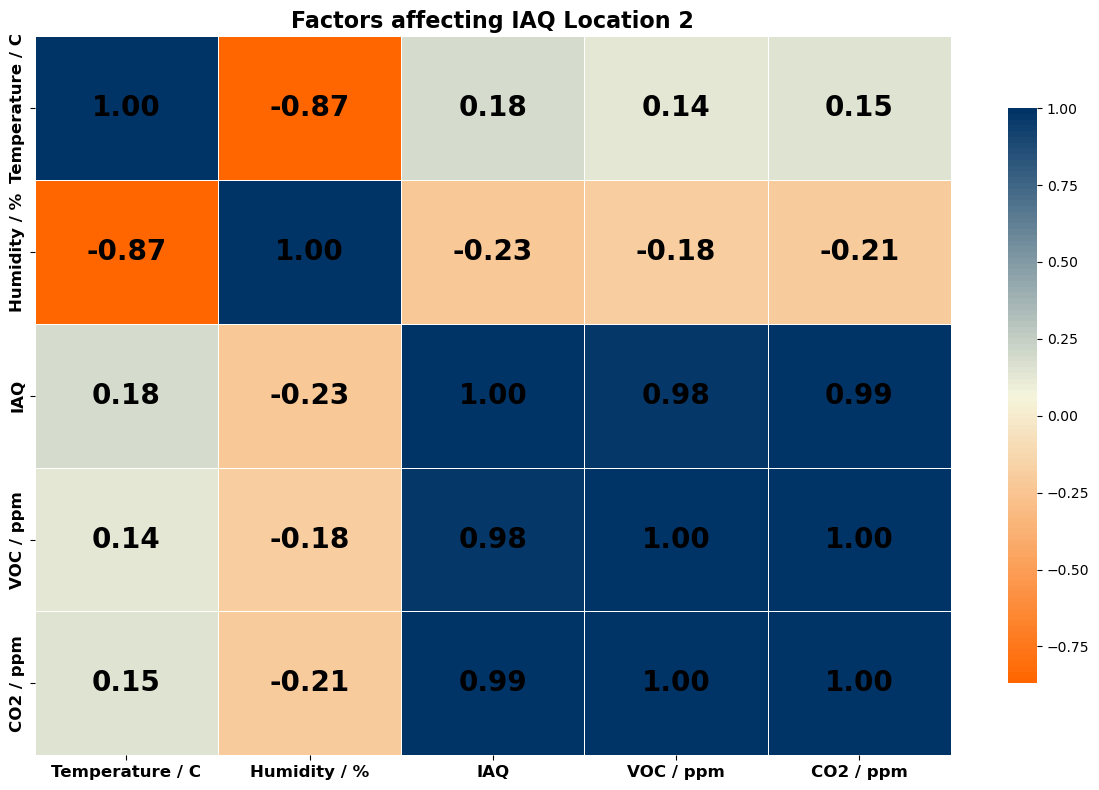

In [24]:
#Colourblind accessible heatmap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

# Load the CSV data into a pandas DataFrame
file_path = '/Users/stephaniebellew/Desktop/Experiment2_Location2_.csv'

# Load the data
df = pd.read_csv(file_path)

# Clean the column names (remove extra spaces)
df.columns = df.columns.str.strip()

# Rename columns: 'Compensated Humidity / C' to 'Humidity / %' and 'VOC / ppb' to 'VOC / ppm'
df.rename(columns={
    'Compensated Humidity / C': 'Humidity / %',
    'VOC / ppb': 'VOC / ppm',
    'iaq':'IAQ',
    'Compensated Temperature / C': 'Temperature / C'
}, inplace=True)

# Selecting relevant columns for the heatmap
relevant_columns = [
    'Temperature / C',  # Arduino indoor temperature
    'Humidity / %',                # Arduino indoor humidity (after renaming)
    'IAQ',                         # Indoor air quality
    'VOC / ppm',                   # VOC pollution concentration (after renaming)
    'CO2 / ppm'                    # CO2 pollution concentration
]

# Subset the DataFrame to include only the relevant columns
df_subset = df[relevant_columns]

# Ensure the data is numeric, converting errors to NaN (to handle any non-numeric data)
df_subset = df_subset.apply(pd.to_numeric, errors='coerce')

# Calculate the variance of each column (handling very small variance using a threshold)
column_variances = df_subset.var()

# Filter out columns where variance is very small (constant columns or nearly constant)
tolerance = 1e-5  # Variance threshold for filtering constant columns
df_subset_filtered = df_subset.loc[:, column_variances > tolerance]

# Check the filtered columns
print(f"Columns after removing constant columns: {df_subset_filtered.columns.tolist()}")

# Drop rows with missing data (NaN values) to ensure clean data for correlation
df_subset_filtered.dropna(inplace=True)

# Calculate the correlation matrix
correlation_matrix = df_subset_filtered.corr()

# Create a custom colormap
colors = ["#FF6600", "#F5F5DC", "#003366"]  # Orange -> White -> Dark Blue
n_bins = 100  # Use 100 bins for smooth transitions
cmap_name = "custom_cmap"
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plotting the heatmap with the custom colormap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=cm, fmt='.2f', linewidths=0.5,
            annot_kws={'size': 20, 'color': 'black', 'weight': 'bold'},  # Black annotation text
            cbar_kws={'shrink': 0.8})

# Customize column and row labels' font size and boldness
plt.xticks(fontsize=12, fontweight='bold')  # Column labels
plt.yticks(fontsize=12, fontweight='bold')  # Row labels

# Add title
plt.title('Factors affecting IAQ Location 2', fontsize=16, fontweight='bold')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Save the plot to your desktop (this will now avoid cropping)
plt.savefig('/Users/stephaniebellew/Desktop/correlation_heatmap_Location2ex2.png', dpi=300)

# Show the plot
plt.show()

In [ ]:
#Colourblind accessible heatmap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

# Load the CSV data into a pandas DataFrame
file_path = '/Users/stephaniebellew/Desktop/Experiment2_Location2_.csv'

# Load the data
df = pd.read_csv(file_path)

# Clean the column names (remove extra spaces)
df.columns = df.columns.str.strip()

# Rename columns: 'Compensated Humidity / C' to 'Humidity / %' and 'VOC / ppb' to 'VOC / ppm'
df.rename(columns={
    'Compensated Humidity / C': 'Humidity / %',
    'VOC / ppb': 'VOC / ppm',
    'iaq':'IAQ',
    'Compensated Temperature / C': 'Temperature / C'
}, inplace=True)

# Selecting relevant columns for the heatmap
relevant_columns = [
    'Temperature / C',  # Arduino indoor temperature
    'Humidity / %',                # Arduino indoor humidity (after renaming)
    'IAQ',                         # Indoor air quality
    'VOC / ppm',                   # VOC pollution concentration (after renaming)
    'CO2 / ppm'                    # CO2 pollution concentration
]

# Subset the DataFrame to include only the relevant columns
df_subset = df[relevant_columns]

# Ensure the data is numeric, converting errors to NaN (to handle any non-numeric data)
df_subset = df_subset.apply(pd.to_numeric, errors='coerce')

# Calculate the variance of each column (handling very small variance using a threshold)
column_variances = df_subset.var()

# Filter out columns where variance is very small (constant columns or nearly constant)
tolerance = 1e-5  # Variance threshold for filtering constant columns
df_subset_filtered = df_subset.loc[:, column_variances > tolerance]

# Check the filtered columns
print(f"Columns after removing constant columns: {df_subset_filtered.columns.tolist()}")

# Drop rows with missing data (NaN values) to ensure clean data for correlation
df_subset_filtered.dropna(inplace=True)

# Calculate the correlation matrix
correlation_matrix = df_subset_filtered.corr()

# Create a custom colormap
colors = ["#FF6600", "#F5F5DC", "#003366"]  # Orange -> White -> Dark Blue
n_bins = 100  # Use 100 bins for smooth transitions
cmap_name = "custom_cmap"
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plotting the heatmap with the custom colormap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=cm, fmt='.2f', linewidths=0.5,
            annot_kws={'size': 20, 'color': 'black', 'weight': 'bold'},  # Black annotation text
            cbar_kws={'shrink': 0.8})

# Customize column and row labels' font size and boldness
plt.xticks(fontsize=12, fontweight='bold')  # Column labels
plt.yticks(fontsize=12, fontweight='bold')  # Row labels

# Add title
plt.title('Factors affecting IAQ', fontsize=16, fontweight='bold')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Save the plot to your desktop (this will now avoid cropping)
plt.savefig('/Users/stephaniebellew/Desktop/correlation_heatmap_Location2ex2.png', dpi=300)

# Show the plot
plt.show()

Columns after removing constant columns: ['Temperature / C', 'Humidity / %', 'Temperature (Weather)', 'Humidity (Weather)']


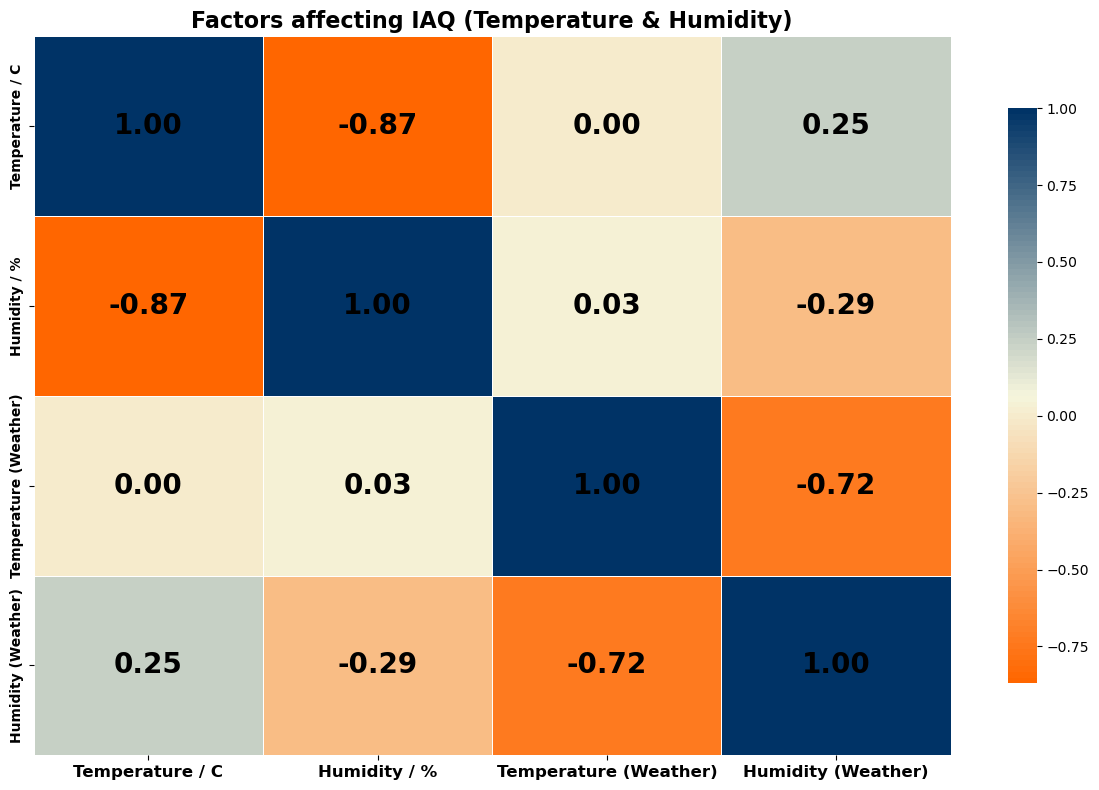

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

# Load the CSV data into a pandas DataFrame
file_path = '/Users/stephaniebellew/Desktop/Experiment2_Location2_.csv'

# Load the data
df = pd.read_csv(file_path)

# Clean the column names (remove extra spaces)
df.columns = df.columns.str.strip()

# Rename columns: 'Temperature / C', 'Humidity / %', 'Temperature (Weather)', 'Humidity (Weather)'
df.rename(columns={
    'Compensated Temperature / C': 'Temperature / C',      # Indoor Temperature
    'Compensated Humidity / C': 'Humidity / %',            # Indoor Humidity
    'Temperature (Weather)': 'Temperature (Weather)',      # Outdoor Temperature
    'Humidity (Weather)': 'Humidity (Weather)',            # Outdoor Humidity
}, inplace=True)

# Selecting relevant columns for the heatmap
relevant_columns = [
    'Temperature / C',              # Indoor Temperature
    'Humidity / %',                 # Indoor Humidity
    'Temperature (Weather)',        # Outdoor Temperature
    'Humidity (Weather)',           # Outdoor Humidity
]

# Subset the DataFrame to include only the relevant columns
df_subset = df[relevant_columns]

# Ensure the data is numeric, converting errors to NaN (to handle any non-numeric data)
df_subset = df_subset.apply(pd.to_numeric, errors='coerce')

# Calculate the variance of each column (handling very small variance using a threshold)
column_variances = df_subset.var()

# Filter out columns where variance is very small (constant columns or nearly constant)
tolerance = 1e-5  # Variance threshold for filtering constant columns
df_subset_filtered = df_subset.loc[:, column_variances > tolerance]

# Check the filtered columns
print(f"Columns after removing constant columns: {df_subset_filtered.columns.tolist()}")

# Drop rows with missing data (NaN values) to ensure clean data for correlation
df_subset_filtered.dropna(inplace=True)

# Calculate the correlation matrix
correlation_matrix = df_subset_filtered.corr()

# Create a custom colormap for better visual representation (colorblind accessible)
colors = ["#FF6600", "#F5F5DC", "#003366"]  # Orange -> White -> Dark Blue
n_bins = 100  # Use 100 bins for smooth transitions
cmap_name = "custom_cmap"
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plotting the heatmap with the custom colormap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=cm, fmt='.2f', linewidths=0.5,
            annot_kws={'size': 20, 'color': 'black', 'weight': 'bold'},  # Black annotation text
            cbar_kws={'shrink': 0.8})

# Customize column and row labels' font size and boldness
plt.xticks(fontsize=12, fontweight='bold')  # Column labels
plt.yticks(fontsize=10, fontweight='bold')  # Row labels

# Add title
plt.title('Factors affecting IAQ (Temperature & Humidity)', fontsize=16, fontweight='bold')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Save the plot to your desktop (this will now avoid cropping)
plt.savefig('/Users/stephaniebellew/Desktop/correlation_heatmap_Temperature_Humiditylo1.png', dpi=300)

# Show the plot
plt.show()


Columns after removing constant columns: ['IAQ', 'CO2 / ppm', 'VOC / ppb', 'AQI (Pollution)', 'CO Concentration', 'NO2 Concentration']


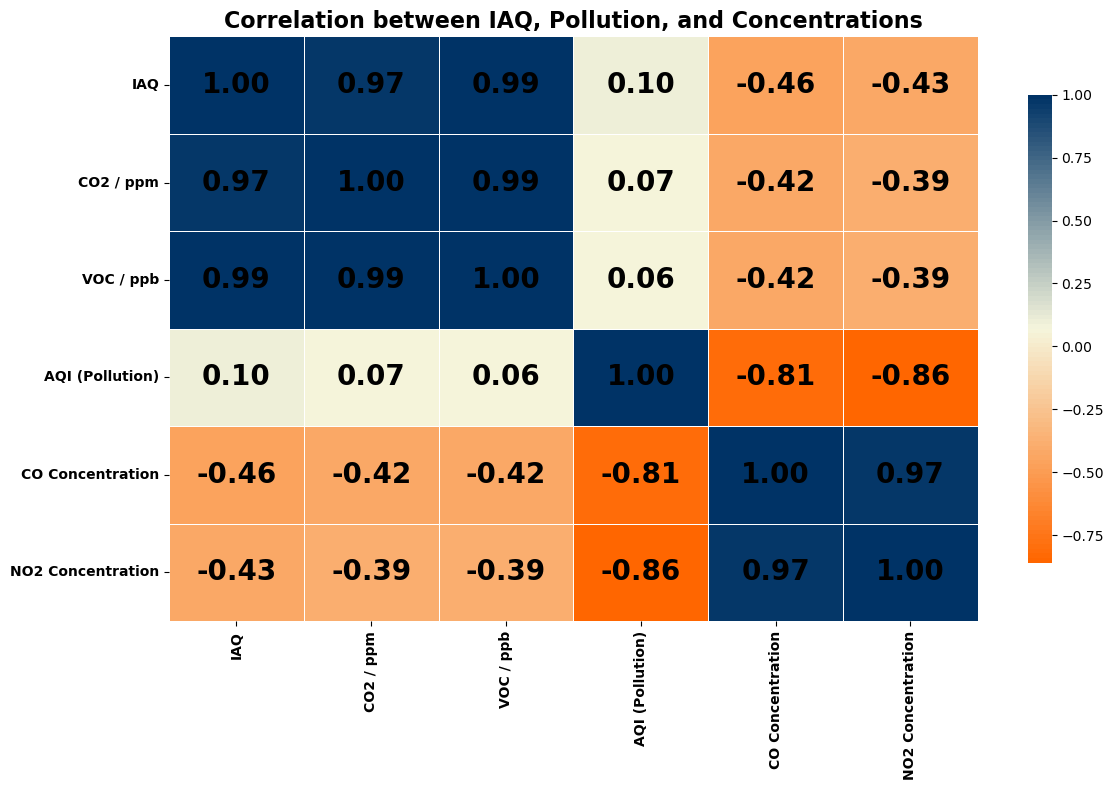

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

# Load the CSV data into a pandas DataFrame
file_path = '/Users/stephaniebellew/Desktop/Experiment2_Location1_.csv'

# Load the data
df = pd.read_csv(file_path)

# Clean the column names (remove extra spaces)
df.columns = df.columns.str.strip()

# Rename columns: Relevant names for IAQ, CO2, VOC, AQI, CO, NO2
df.rename(columns={
    'iaq': 'IAQ',                           # Indoor Air Quality
    'CO2 / ppm': 'CO2 / ppm',               # CO2 Concentration
    'VOC / ppb': 'VOC / ppb',               # VOC Pollution
    'AQI (Pollution)': 'AQI (Pollution)',   # Air Quality Index (Pollution)
    'CO Concentration': 'CO Concentration', # CO Concentration
    'NO2 Concentration': 'NO2 Concentration', # NO2 Concentration
}, inplace=True)

# Selecting relevant columns for the heatmap
relevant_columns = [
    'IAQ',                              # Indoor Air Quality
    'CO2 / ppm',                        # CO2 Concentration
    'VOC / ppb',                        # VOC Pollution
    'AQI (Pollution)',                  # Air Quality Index (Pollution)
    'CO Concentration',                 # CO Concentration
    'NO2 Concentration'                 # NO2 Concentration
]

# Subset the DataFrame to include only the relevant columns
df_subset = df[relevant_columns]

# Ensure the data is numeric, converting errors to NaN (to handle any non-numeric data)
df_subset = df_subset.apply(pd.to_numeric, errors='coerce')

# Calculate the variance of each column (handling very small variance using a threshold)
column_variances = df_subset.var()

# Filter out columns where variance is very small (constant columns or nearly constant)
tolerance = 1e-5  # Variance threshold for filtering constant columns
df_subset_filtered = df_subset.loc[:, column_variances > tolerance]

# Check the filtered columns
print(f"Columns after removing constant columns: {df_subset_filtered.columns.tolist()}")

# Drop rows with missing data (NaN values) to ensure clean data for correlation
df_subset_filtered.dropna(inplace=True)

# Calculate the correlation matrix
correlation_matrix = df_subset_filtered.corr()

# Create a custom colormap for better visual representation (colorblind accessible)
colors = ["#FF6600", "#F5F5DC", "#003366"]  # Orange -> White -> Dark Blue
n_bins = 100  # Use 100 bins for smooth transitions
cmap_name = "custom_cmap"
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plotting the heatmap with the custom colormap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=cm, fmt='.2f', linewidths=0.5,
            annot_kws={'size': 20, 'color': 'black', 'weight': 'bold'},  # Black annotation text
            cbar_kws={'shrink': 0.8})

# Customize column and row labels' font size and boldness
plt.xticks(fontsize=10, fontweight='bold')  # Column labels
plt.yticks(fontsize=10, fontweight='bold')  # Row labels

# Add title
plt.title('Correlation between IAQ, Pollution, and Concentrations', fontsize=16, fontweight='bold')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Save the plot to your desktop (this will now avoid cropping)
plt.savefig('/Users/stephaniebellew/Desktop/correlation_heatmap_Pollution_IAQ.png', dpi=300)

# Show the plot
plt.show()


   IAQ1  IAQ2  IAQ Difference           timestamp
0   109    21              88 2024-12-03 23:01:26
1   109    21              88 2024-12-03 23:01:27
2   113    22              91 2024-12-03 23:01:29
3   113    22              91 2024-12-03 23:01:30
4   113    21              92 2024-12-03 23:01:31


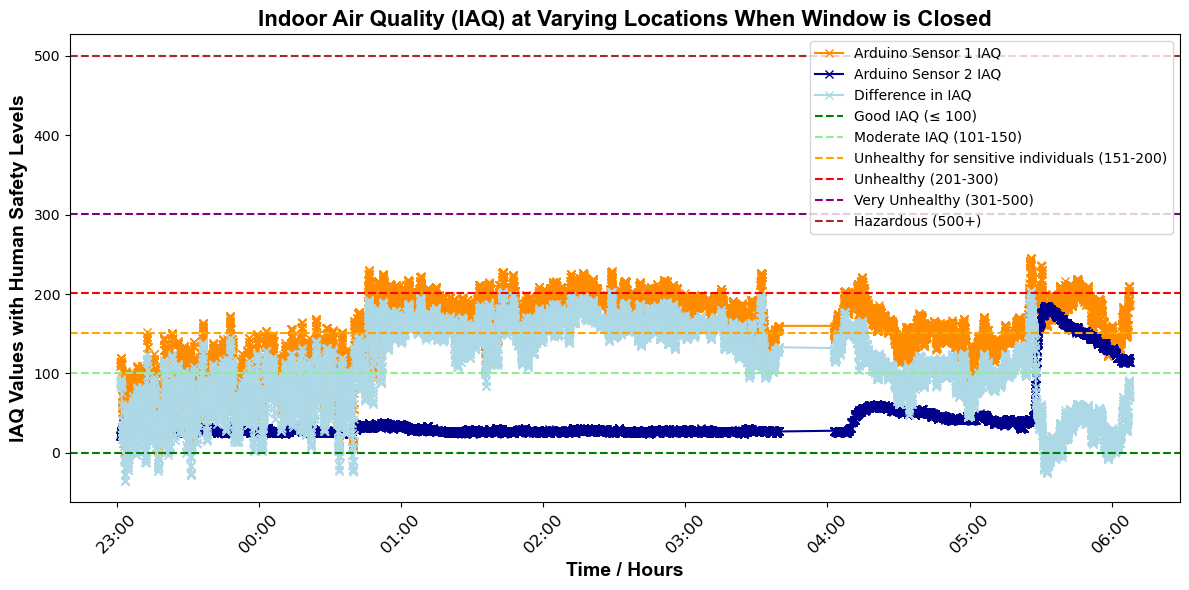

Plot saved to: /Users/stephaniebellew/Desktop/IAQ_plotexp2.png


In [15]:
#text to speech graph
#uncomment the line below if you do not already have pyttsx3 installed 
#pip install pyttsx3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pyttsx3

# Initialize the pyttsx3 engine for text-to-speech
engine = pyttsx3.init()

# Load the Excel file
file_path = '/Users/stephaniebellew/Desktop/IAQWO.xlsx'
engine.say("Loading data from the file IAQWO.xlsx.")
df = pd.read_excel(file_path)

# Check the first few rows to ensure the column names are correct
engine.say("Displaying the first few rows of the data to verify the column names.")
print(df.head())

# Assuming your columns are: 'IAQ1', 'IAQ2', 'IAQ difference', and 'timestamp'
# If your column names are different, adjust accordingly

# Convert 'timestamp' column to pandas datetime format
engine.say("Converting the timestamp data to datetime format.")
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Define IAQ thresholds for health categories
thresholds = {
    "Good IAQ": 0,                # Below this value is considered Good
    "Moderate IAQ": 101,            # Moderate IAQ up to this value
    "Unhealthy for sensitive individuals": 151,
    "Unhealthy": 201,
    "Very Unhealthy": 301,
    "Hazardous": 500                # Hazardous beyond 500
}

# Plotting
engine.say("Starting to generate the plot for Indoor Air Quality data.")
plt.figure(figsize=(12, 6))

# Plot 'IAQ1', 'IAQ2', and 'IAQ difference' against 'timestamp'
plt.plot(df['timestamp'], df['IAQ1'], label='Arduino Sensor 1 IAQ', marker='x', color='darkorange')
plt.plot(df['timestamp'], df['IAQ2'], label='Arduino Sensor 2 IAQ', marker='x', color='darkblue')
plt.plot(df['timestamp'], df['IAQ Difference'], label='Difference in IAQ', marker='x', color='lightblue')

# Add threshold lines for IAQ categories
plt.axhline(thresholds["Good IAQ"], color='green', linestyle='--', label="Good IAQ (≤ 100)")
plt.axhline(thresholds["Moderate IAQ"], color='lightgreen', linestyle='--', label="Moderate IAQ (101-150)")
plt.axhline(thresholds["Unhealthy for sensitive individuals"], color='orange', linestyle='--', label="Unhealthy for sensitive individuals (151-200)")
plt.axhline(thresholds["Unhealthy"], color='red', linestyle='--', label="Unhealthy (201-300)")
plt.axhline(thresholds["Very Unhealthy"], color='purple', linestyle='--', label="Very Unhealthy (301-500)")
plt.axhline(thresholds["Hazardous"], color='brown', linestyle='--', label="Hazardous (500+)")

# Formatting the x-axis to display Hours:Minutes (HH:MM)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Set labels for the axes with larger font size, bold, and Arial font
plt.xlabel('Time / Hours', fontsize=14, fontweight='bold', family='Arial')
plt.ylabel('IAQ Values with Human Safety Levels', fontsize=14, fontweight='bold', family='Arial')

# Set title with larger font size, bold, and Arial font
plt.title('Indoor Air Quality (IAQ) at Varying Locations When Window is Closed', 
          fontsize=16, fontweight='bold', family='Arial')

# Add a legend
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Tight layout to prevent label cut-off
plt.tight_layout()

# Save the plot to your desktop
save_path = '/Users/stephaniebellew/Desktop/IAQ_plotexp2.png'  # Change the extension if needed
plt.savefig(save_path)

# Description of the plot for the visually impaired
engine.say("The chart illustrates the difference in IAQ which stands for Indoor Air Quality across two locations in a room when the window is closed in a bedroom overnight.The Indoor Air Quality starts at a safe level, but as time progresses, it increases, peaking twice at levels which are very unhealthy. There is very little difference in IAQ between the two locations, suggesting poor ventilation when the window is closed.")

# Run the speech engine to read out the description
engine.runAndWait()

# Show the plot
plt.show()

# Inform the user that the plot has been saved
engine.say(f"The plot has been saved to: {save_path}")
engine.runAndWait()

# Print the save path to the console for confirmation
print(f"Plot saved to: {save_path}")

   IAQ1  IAQ2  IAQ Difference           timestamp
0   109    21              88 2024-12-03 23:01:26
1   109    21              88 2024-12-03 23:01:27
2   113    22              91 2024-12-03 23:01:29
3   113    22              91 2024-12-03 23:01:30
4   113    21              92 2024-12-03 23:01:31


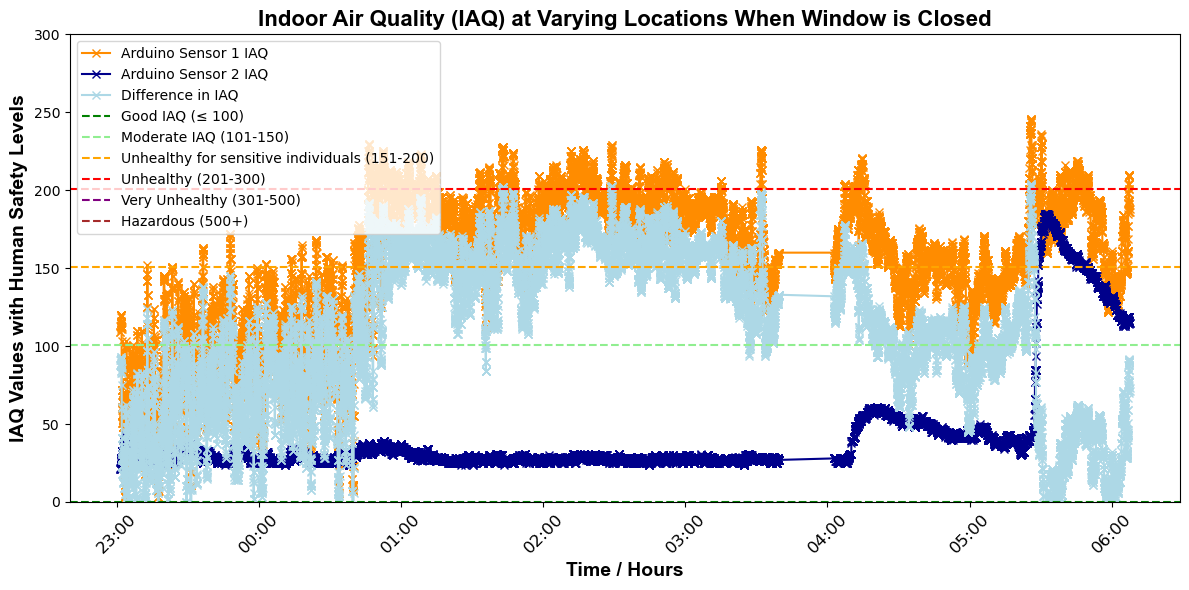

Plot saved to: /Users/stephaniebellew/Desktop/IAQ_plotexp2.png


In [16]:
# text to speech graph
# uncomment the line below if you do not already have pyttsx3 installed 
# pip install pyttsx3

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pyttsx3

# Initialize the pyttsx3 engine for text-to-speech
engine = pyttsx3.init()

# Load the Excel file
file_path = '/Users/stephaniebellew/Desktop/IAQWO.xlsx'
engine.say("Loading data from the file IAQWO.xlsx.")
df = pd.read_excel(file_path)

# Check the first few rows to ensure the column names are correct
engine.say("Displaying the first few rows of the data to verify the column names.")
print(df.head())

# Assuming your columns are: 'IAQ1', 'IAQ2', 'IAQ difference', and 'timestamp'
# If your column names are different, adjust accordingly

# Convert 'timestamp' column to pandas datetime format
engine.say("Converting the timestamp data to datetime format.")
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Define IAQ thresholds for health categories
thresholds = {
    "Good IAQ": 0,                # Below this value is considered Good
    "Moderate IAQ": 101,            # Moderate IAQ up to this value
    "Unhealthy for sensitive individuals": 151,
    "Unhealthy": 201,
    "Very Unhealthy": 301,
    "Hazardous": 500                # Hazardous beyond 500
}

# Plotting
engine.say("Starting to generate the plot for Indoor Air Quality data.")
plt.figure(figsize=(12, 6))

# Plot 'IAQ1', 'IAQ2', and 'IAQ difference' against 'timestamp'
plt.plot(df['timestamp'], df['IAQ1'], label='Arduino Sensor 1 IAQ', marker='x', color='darkorange')
plt.plot(df['timestamp'], df['IAQ2'], label='Arduino Sensor 2 IAQ', marker='x', color='darkblue')
plt.plot(df['timestamp'], df['IAQ Difference'], label='Difference in IAQ', marker='x', color='lightblue')

# Add threshold lines for IAQ categories
plt.axhline(thresholds["Good IAQ"], color='green', linestyle='--', label="Good IAQ (≤ 100)")
plt.axhline(thresholds["Moderate IAQ"], color='lightgreen', linestyle='--', label="Moderate IAQ (101-150)")
plt.axhline(thresholds["Unhealthy for sensitive individuals"], color='orange', linestyle='--', label="Unhealthy for sensitive individuals (151-200)")
plt.axhline(thresholds["Unhealthy"], color='red', linestyle='--', label="Unhealthy (201-300)")
plt.axhline(thresholds["Very Unhealthy"], color='purple', linestyle='--', label="Very Unhealthy (301-500)")
plt.axhline(thresholds["Hazardous"], color='brown', linestyle='--', label="Hazardous (500+)")

# Formatting the x-axis to display Hours:Minutes (HH:MM)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Set labels for the axes with larger font size, bold, and Arial font
plt.xlabel('Time / Hours', fontsize=14, fontweight='bold', family='Arial')
plt.ylabel('IAQ Values with Human Safety Levels', fontsize=14, fontweight='bold', family='Arial')

# Set title with larger font size, bold, and Arial font
plt.title('Indoor Air Quality (IAQ) at Varying Locations When Window is Closed', 
          fontsize=16, fontweight='bold', family='Arial')

# Add a legend
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Adjust the y-axis to limit values to a maximum of 300
plt.ylim(0, 300)  # Set the y-axis limit (0 to 300)

# Tight layout to prevent label cut-off
plt.tight_layout()

# Save the plot to your desktop
save_path = '/Users/stephaniebellew/Desktop/IAQ_plotexp2.png'  # Change the extension if needed
plt.savefig(save_path)

# Description of the plot for the visually impaired
engine.say("The chart illustrates the difference in IAQ which stands for Indoor Air Quality across two locations in a room when the window is closed in a bedroom overnight.The Indoor Air Quality starts at a safe level, but as time progresses, it increases, peaking twice at levels which are very unhealthy. There is very little difference in IAQ between the two locations, suggesting poor ventilation when the window is closed.")

# Run the speech engine to read out the description
engine.runAndWait()

# Show the plot
plt.show()

# Inform the user that the plot has been saved
engine.say(f"The plot has been saved to: {save_path}")
engine.runAndWait()

# Print the save path to the console for confirmation
print(f"Plot saved to: {save_path}")
